# Fully Connected Neural Networks in TensorFlow's Keras


We will use dense neural networks in Keras to solve a simple regression problem. 

The dataset is a collection of simulated particle events from [Pythia](http://home.thep.lu.se/~torbjorn/Pythia.html). Specifically, we will construct a dense neural network which will learn how to calculate the invariant mass of a particle from its energy and momentum.

First, import `numpy`, `tensorflow`, and `pylab` and load the data.


In [1]:
import numpy as np
import tensorflow as tf
import pylab as plt

In [2]:
# load the data, which is stored as a numpy array data type
energy = np.load("homogenous-16-particle-events-energy.npy")

The dataset is a 2D array where each row represents one event of data from an electron-proton collision. This dataset is comprised _only_ of events where there were exactly 16 particles produced from an electron-proton collision. Each particle has an x-momentum, y-momentum, z-momentum, energy, and charge: $(p_x,p_y,p_z,E,q)$. Each event is therefore represented by 80 numbers. Using numpy's reshape method we can make each row represent one particle. 

In [3]:
# Here we rearrange the data within each of the events to isolate particles
print(energy.shape)
energy = np.reshape(energy, (len(energy), 16, 5))
print(energy.shape)

# Use another call of reshape to combine all events
# Complete me:
# Target: (#events*16, 5)
energy = np.reshape(energy,(len(energy)* 16, 5))
print(energy.shape)

# Print the energy to make sure this worked
# print()

(35916, 80)
(35916, 16, 5)
(574656, 5)


These are our training data inputs, but we also must provide the targets, which are the invariant masses of each particle. This is a straightforward computation that does not require neural networks, but provides an easy-to-understand problem.

We choose units where $c = 1$:
$$m^2=E^2-||\textbf{p}||^2$$
where $m, E$, and $\textbf{p}$ are all in GeV.

In [4]:
# Complete me:
p2 = energy[:,0]**2 + energy[:,1]**2 + energy[:,2]**2
target = np.sqrt(np.maximum(energy[:, 3]**2 - p2, 0))

print(target.shape)

(574656,)


There are several hundred thousand datapoints in this dataset which is overkill for this simple example. Create a test dataset with just 1000 examples.

In [5]:
#Slicing allows you select a subset of an array.
#This can be done like this: smallerArray = largerArray[:100]

#Complete me:
smallEnergy = energy[:1000]
smallTarget = target[:1000]

print(smallEnergy.shape, smallTarget.shape)

(1000, 5) (1000,)


Next, make a histogram of the target data to make sure that we are seeing masses of real particles. As this data has limited precision, this will not resolve electrons very well, but protons, pions, and massless particles should be clearly visible.

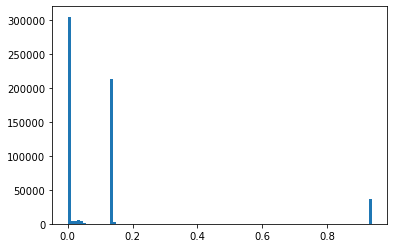

In [6]:
plt.hist(target,bins=100)
plt.show()

Now we can build and train the first neural network. Start with a simple one hidden layer network with 5 neurons, and ReLU activation. Train for 30 epochs with a batch size of 256, an Adam optimizer with a learning rate of 0.1, using mean squared error loss. 

Use a non-standard validation split of 0.8 when fitting to demonstrate overtraining. 

Information on how to implement these features can be found here:
<https://www.tensorflow.org/api_docs/python/tf/keras>.
Check out Sequential underneath models and Dense under layers.


In [7]:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(5, input_shape=(5,), activation="relu")) #Add the hidden layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=256, validation_split=0.8)

Epoch 1/30
1/1 [==============================] - 0s 268ms/step - loss: 6.8915 - val_loss: 0.8208
Epoch 2/30
1/1 [==============================] - 0s 57ms/step - loss: 1.9487 - val_loss: 0.7047
Epoch 3/30
1/1 [==============================] - 0s 47ms/step - loss: 0.4499 - val_loss: 1.7740
Epoch 4/30
1/1 [==============================] - 0s 49ms/step - loss: 1.0712 - val_loss: 1.7602
Epoch 5/30
1/1 [==============================] - 0s 49ms/step - loss: 1.2732 - val_loss: 1.1205
Epoch 6/30
1/1 [==============================] - 0s 55ms/step - loss: 0.9357 - val_loss: 0.5553
Epoch 7/30
1/1 [==============================] - 0s 47ms/step - loss: 0.5428 - val_loss: 0.2585
Epoch 8/30
1/1 [==============================] - 0s 55ms/step - loss: 0.2831 - val_loss: 0.1504
Epoch 9/30
1/1 [==============================] - 0s 61ms/step - loss: 0.1571 - val_loss: 0.1344
Epoch 10/30
1/1 [==============================] - 0s 48ms/step - loss: 0.1282 - val_loss: 0.1519
Epoch 11/30
1/1 [===========

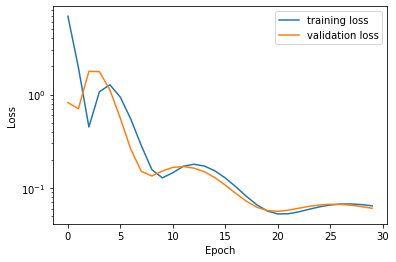

In [8]:
history = results.history

def plot_learning_curve(history):
    plt.plot(history["loss"], label="training loss")
    plt.plot(history["val_loss"], label="validation loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.yscale('log')
    plt.legend()
    plt.show()

plot_learning_curve(results.history)

The model is learning, but we can do better. Perhaps we did not have enough model parameters to accurately represent the mapping. Remedy this by increasing the number of hidden neurons to 20.

Epoch 1/30
1/1 [==============================] - 0s 98ms/step - loss: 6.2814 - val_loss: 2.7940
Epoch 2/30
1/1 [==============================] - 0s 54ms/step - loss: 4.8870 - val_loss: 1.7997
Epoch 3/30
1/1 [==============================] - 0s 45ms/step - loss: 2.5388 - val_loss: 0.4822
Epoch 4/30
1/1 [==============================] - 0s 44ms/step - loss: 0.3027 - val_loss: 0.6189
Epoch 5/30
1/1 [==============================] - 0s 58ms/step - loss: 0.4057 - val_loss: 0.9913
Epoch 6/30
1/1 [==============================] - 0s 83ms/step - loss: 0.8836 - val_loss: 1.0229
Epoch 7/30
1/1 [==============================] - 0s 84ms/step - loss: 0.9133 - val_loss: 0.7864
Epoch 8/30
1/1 [==============================] - 0s 66ms/step - loss: 0.6214 - val_loss: 0.5022
Epoch 9/30
1/1 [==============================] - 0s 46ms/step - loss: 0.3027 - val_loss: 0.2980
Epoch 10/30
1/1 [==============================] - 0s 53ms/step - loss: 0.1103 - val_loss: 0.1999
Epoch 11/30
1/1 [============

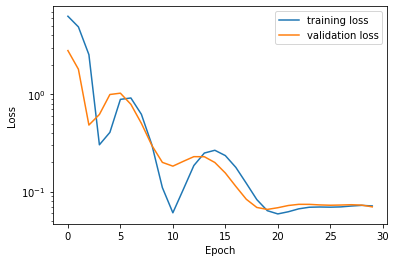

In [9]:
#Use the same code as in the previous cell
#simply change the number of neurons in the hidden layer

#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=256, validation_split=0.8)

plot_learning_curve(results.history)

We see that we got little improvement here. Another hyperparameter to adjust is *batch size*, which is the number of training examples used to calculate the gradient on each step. While you may initially think that a higher batch size leads to faster or more accurate training, in practice this is not true. The "noise" that arises from using less training examples at each iteration can actually help find the global minimum of the loss function.
(See here for more info: https://arxiv.org/pdf/1609.04836.pdf)

Try decreasing the batch size to 16.

Epoch 1/30
13/13 [==============================] - 0s 15ms/step - loss: 26.4819 - val_loss: 4.1514
Epoch 2/30
13/13 [==============================] - 0s 8ms/step - loss: 7.1979 - val_loss: 0.1374
Epoch 3/30
13/13 [==============================] - 0s 9ms/step - loss: 0.1511 - val_loss: 0.1397
Epoch 4/30
13/13 [==============================] - 0s 9ms/step - loss: 0.1222 - val_loss: 0.0733
Epoch 5/30
13/13 [==============================] - 0s 11ms/step - loss: 0.0537 - val_loss: 0.0594
Epoch 6/30
13/13 [==============================] - 0s 9ms/step - loss: 0.0516 - val_loss: 0.0602
Epoch 7/30
13/13 [==============================] - 0s 9ms/step - loss: 0.0513 - val_loss: 0.0583
Epoch 8/30
13/13 [==============================] - 0s 10ms/step - loss: 0.0503 - val_loss: 0.0577
Epoch 9/30
13/13 [==============================] - 0s 10ms/step - loss: 0.0499 - val_loss: 0.0572
Epoch 10/30
13/13 [==============================] - 0s 10ms/step - loss: 0.0498 - val_loss: 0.0572
Epoch 11/30
1

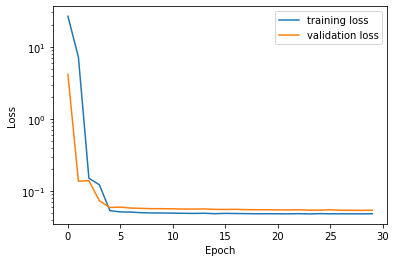

In [10]:
#Complete me:

#Use the same code as in the previous cell
#simply change the number of neurons in the hidden layer

#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.1),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=16, validation_split=0.8)

plot_learning_curve(results.history)


This is starting to do better but has significant room for improvement.

Another hyperparameter to tune is the *learning rate*. 

 - If the learning rate is too high, we are taking too large of a step in the gradient descent at each iteration and will miss narrow minima in the loss function. 
 - If the learning rate is too small, then we are not traveling far enough in each iteration and we will take far too long to reach a minimum. 

Perhaps the learning rate is too high and the network can't fine tune. Try decreasing the learning rate to 0.001.

Epoch 1/30
13/13 [==============================] - 0s 14ms/step - loss: 4.5425 - val_loss: 2.9890
Epoch 2/30
13/13 [==============================] - 0s 9ms/step - loss: 3.2045 - val_loss: 2.2540
Epoch 3/30
13/13 [==============================] - 0s 8ms/step - loss: 2.3627 - val_loss: 1.6603
Epoch 4/30
13/13 [==============================] - 0s 9ms/step - loss: 1.6493 - val_loss: 1.2361
Epoch 5/30
13/13 [==============================] - 0s 9ms/step - loss: 1.2302 - val_loss: 0.9011
Epoch 6/30
13/13 [==============================] - 0s 9ms/step - loss: 0.8328 - val_loss: 0.6741
Epoch 7/30
13/13 [==============================] - 0s 10ms/step - loss: 0.5772 - val_loss: 0.5126
Epoch 8/30
13/13 [==============================] - 0s 9ms/step - loss: 0.4082 - val_loss: 0.3891
Epoch 9/30
13/13 [==============================] - 0s 9ms/step - loss: 0.2817 - val_loss: 0.3011
Epoch 10/30
13/13 [==============================] - 0s 9ms/step - loss: 0.2086 - val_loss: 0.2402
Epoch 11/30
13/13

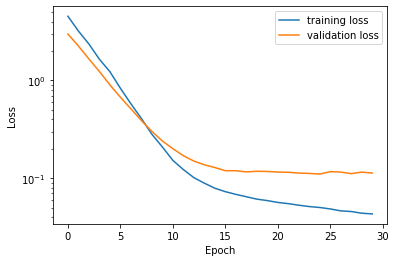

In [11]:
#complete me:

#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=16, validation_split=0.8)

plot_learning_curve(results.history)



This is not really that much better, but now there is evidence of *overtraining* or *overfitting* -- the training loss is so much lower than the validation loss. 

A common fix to this is adding *dropout layers*. Try adding a dropout layer with dropout rate of 0.5. <https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout>

You can also try batch normalization: <https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization>

Epoch 1/30
13/13 [==============================] - 0s 14ms/step - loss: 2.7704 - val_loss: 2.7756
Epoch 2/30
13/13 [==============================] - 0s 8ms/step - loss: 1.9555 - val_loss: 2.1723
Epoch 3/30
13/13 [==============================] - 0s 10ms/step - loss: 1.4368 - val_loss: 1.7101
Epoch 4/30
13/13 [==============================] - 0s 9ms/step - loss: 1.1540 - val_loss: 1.3206
Epoch 5/30
13/13 [==============================] - 0s 10ms/step - loss: 0.9538 - val_loss: 1.0584
Epoch 6/30
13/13 [==============================] - 0s 9ms/step - loss: 0.7348 - val_loss: 0.8602
Epoch 7/30
13/13 [==============================] - 0s 10ms/step - loss: 0.5644 - val_loss: 0.6905
Epoch 8/30
13/13 [==============================] - 0s 9ms/step - loss: 0.5157 - val_loss: 0.5741
Epoch 9/30
13/13 [==============================] - 0s 10ms/step - loss: 0.4440 - val_loss: 0.4902
Epoch 10/30
13/13 [==============================] - 0s 9ms/step - loss: 0.3429 - val_loss: 0.4319
Epoch 11/30
13

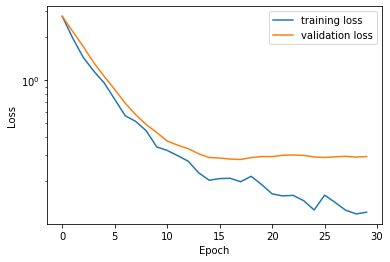

In [24]:
#Dropout layers are located under tf.keras.layers. 
#They take the dropout rate as their only argument.
#BatchNormalization layers are also under tf.keras.layers, and in the simplest use case, take no arguments

#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

rate=0.5
#model.add(tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)) #adding dropout layer

model.add(tf.keras.layers.BatchNormalization()) #adding Batch Normalization, active for previously added layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(smallEnergy, smallTarget, epochs=30, batch_size=16, validation_split=0.8)

plot_learning_curve(results.history)


This clearly stopped the overtraining problem, but it still isn't training well. Now, try training on the full dataset with a more reasonable validation split of 0.2. Use a single hidden layer with 20 neurons, a learning rate of 0.001, and a batch size of 256. Just run it for 10 epochs.

Epoch 1/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.1270 - val_loss: 0.0138
Epoch 2/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0135 - val_loss: 0.0104
Epoch 3/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0111 - val_loss: 0.0091
Epoch 4/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0098 - val_loss: 0.0084
Epoch 5/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0087 - val_loss: 0.0085
Epoch 6/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0079 - val_loss: 0.0071
Epoch 7/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0075 - val_loss: 0.0072
Epoch 8/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0072 - val_loss: 0.0066
Epoch 9/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0070 - val_loss: 0.0088
Epoch 10/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.006

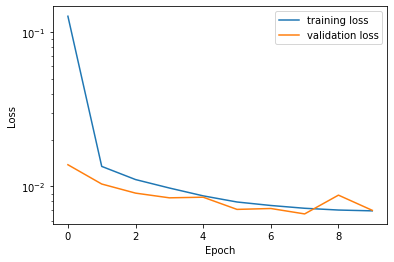

In [26]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

rate=0.5
#model.add(tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)) #adding dropout layer

#model.add(tf.keras.layers.BatchNormalization()) #adding Batch Normalization, active for previously added layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

This clearly resulted in a significant improvement and shows how important having a large enough dataset is. Moving on to the choice in activation functions, ReLU is not the only available choice, although it is one of the most popular ones currently. Try training a network using a sigmoid or tanh activation function.

Epoch 1/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0273 - val_loss: 0.0117
Epoch 2/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0097 - val_loss: 0.0085
Epoch 3/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 4/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0062 - val_loss: 0.0056
Epoch 5/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 6/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 7/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 8/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 9/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 10/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.004

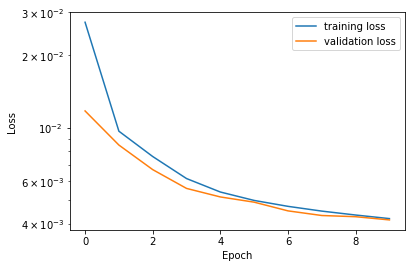

In [28]:
#Simply change relu to sigmoid or tanh to change the activation function

#Complete me:
#Complete me:
model = tf.keras.Sequential() #Define the model object
#model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="sigmoid")) #Add the hidden layer
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="tanh")) #Add the hidden layer

rate=0.5
#model.add(tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)) #adding dropout layer

#model.add(tf.keras.layers.BatchNormalization()) #adding Batch Normalization, active for previously added layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

Next, try adding 2 new hidden layers to the network. Use the ReLU activation function.

Epoch 1/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0255 - val_loss: 0.0072
Epoch 2/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0058 - val_loss: 0.0047
Epoch 3/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 4/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 5/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 6/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 10/10
1796/1796 [==============================] - 4s 2ms/step - loss: 0.001

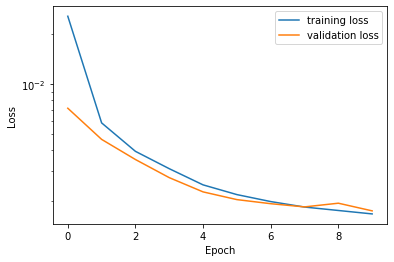

In [29]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer
model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

rate=0.5
#model.add(tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)) #adding dropout layer

#model.add(tf.keras.layers.BatchNormalization()) #adding Batch Normalization, active for previously added layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

Clearly, adding more layers helps improve the quality of the network. There is a limit to how effective this is though. Try having 5 hidden layers.

Epoch 1/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0045 - val_loss: 8.8976e-04
Epoch 2/10
1796/1796 [==============================] - 5s 3ms/step - loss: 7.8023e-04 - val_loss: 5.0863e-04
Epoch 3/10
1796/1796 [==============================] - 5s 3ms/step - loss: 5.4649e-04 - val_loss: 8.6247e-04
Epoch 4/10
1796/1796 [==============================] - 5s 3ms/step - loss: 5.2509e-04 - val_loss: 2.4690e-04
Epoch 5/10
1796/1796 [==============================] - 5s 3ms/step - loss: 4.8905e-04 - val_loss: 3.3541e-04
Epoch 6/10
1796/1796 [==============================] - 5s 3ms/step - loss: 4.7508e-04 - val_loss: 0.0012
Epoch 7/10
1796/1796 [==============================] - 5s 3ms/step - loss: 5.7521e-04 - val_loss: 9.6004e-04
Epoch 8/10
1796/1796 [==============================] - 5s 3ms/step - loss: 4.3521e-04 - val_loss: 7.8818e-04
Epoch 9/10
1796/1796 [==============================] - 5s 3ms/step - loss: 5.0126e-04 - val_loss: 7.2602e-04
Epoch 10/10
1796/1

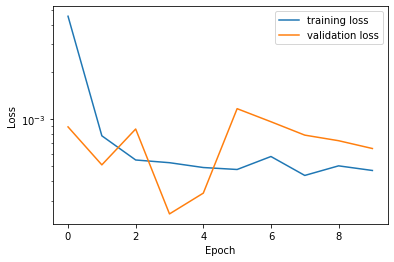

In [30]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
for i in range(5):
    model.add(tf.keras.layers.Dense(20, input_shape=(5,), activation="relu")) #Add the hidden layer

rate=0.5
#model.add(tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)) #adding dropout layer

#model.add(tf.keras.layers.BatchNormalization()) #adding Batch Normalization, active for previously added layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

Now, see what happens when you increase the number of neurons per layer from 20 to 50 in the 3 hidden layer model. Consider how they perform compared to ReLU now. 

Epoch 1/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 2/10
1796/1796 [==============================] - 6s 3ms/step - loss: 7.1624e-04 - val_loss: 4.6714e-04
Epoch 3/10
1796/1796 [==============================] - 6s 3ms/step - loss: 5.2765e-04 - val_loss: 7.7546e-04
Epoch 4/10
1796/1796 [==============================] - 6s 3ms/step - loss: 4.6913e-04 - val_loss: 2.8402e-04
Epoch 5/10
1796/1796 [==============================] - 6s 3ms/step - loss: 4.3847e-04 - val_loss: 6.4947e-04
Epoch 6/10
1796/1796 [==============================] - 6s 3ms/step - loss: 3.9192e-04 - val_loss: 4.7588e-04
Epoch 7/10
1796/1796 [==============================] - 6s 3ms/step - loss: 3.9455e-04 - val_loss: 2.5669e-04
Epoch 8/10
1796/1796 [==============================] - 6s 3ms/step - loss: 3.5288e-04 - val_loss: 3.5233e-04
Epoch 9/10
1796/1796 [==============================] - 5s 3ms/step - loss: 4.0034e-04 - val_loss: 5.3166e-04
Epoch 10/10
1796/1

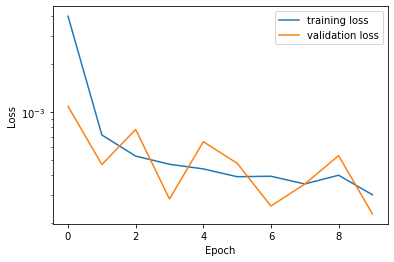

In [31]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
for i in range(3):
    model.add(tf.keras.layers.Dense(50, input_shape=(5,), activation="relu")) #Add the hidden layer

rate=0.5
#model.add(tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)) #adding dropout layer

#model.add(tf.keras.layers.BatchNormalization()) #adding Batch Normalization, active for previously added layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

Try using the sigmoid and the tanh activation functions again and compare them to ReLU.

Epoch 1/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0178 - val_loss: 0.0082
Epoch 2/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0074 - val_loss: 0.0065
Epoch 3/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 4/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 5/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 6/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 7/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 8/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/10
1796/1796 [==============================] - 6s 3ms/step - loss: 9.9324e-04 - val_loss: 7.8743e-04
Epoch 10/10
1796/1796 [==============================] - 6s 3ms/step - los

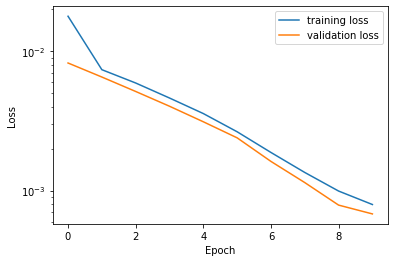

In [32]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
for i in range(3):
    model.add(tf.keras.layers.Dense(50, input_shape=(5,), activation="sigmoid")) #Add the hidden layer

rate=0.5
#model.add(tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)) #adding dropout layer

#model.add(tf.keras.layers.BatchNormalization()) #adding Batch Normalization, active for previously added layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

This difference in performance, especially with the sigmoid function, is known as the vanishing gradient problem. If the value for any one the neurons gets too far away from 0, the gradient for sigmoid and tanh gets really close to 0. This means that for deeper networks it is much more difficult to update the weights in the earlier layers as their gradient is so small. Now, remove the fifth column from the input data, the charge, and see what happens when training. Why do you think including charge has such a large impact?

Epoch 1/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0098 - val_loss: 0.0038
Epoch 2/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 3/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 4/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 5/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 6/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 7/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 8/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 9/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 10/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.001

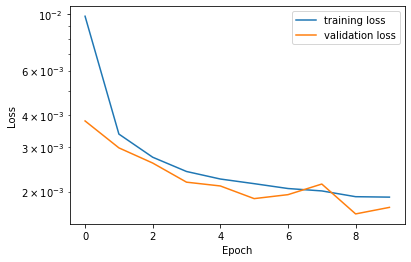

In [37]:
#Complete me:
model = tf.keras.Sequential() #Define the model object
for i in range(3):
    model.add(tf.keras.layers.Dense(50, input_shape=(4,), activation="relu")) #Add the hidden layer

rate=0.5
#model.add(tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)) #adding dropout layer

#model.add(tf.keras.layers.BatchNormalization()) #adding Batch Normalization, active for previously added layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.Adam(lr=0.001),loss=tf.keras.losses.MeanSquaredError()) #Adam optimizer and mean squared error loss
results = model.fit(energy[:,:-1], target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)

Finally, there are other options for the loss function. Try experimenting with alternatives to mean squared error.

<https://www.tensorflow.org/api_docs/python/tf/keras/losses>

You can also try some other optimizers -- for example, sgd (with and without momentum), rmsprop, adagrad, adadelta, adamax, and nadam. <https://www.tensorflow.org/api_docs/python/tf/keras/optimizers>



Epoch 1/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0272 - val_loss: 0.0201
Epoch 2/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0176 - val_loss: 0.0153
Epoch 3/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0137 - val_loss: 0.0123
Epoch 4/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0114 - val_loss: 0.0105
Epoch 5/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0099 - val_loss: 0.0093
Epoch 6/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0085
Epoch 7/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0082 - val_loss: 0.0079
Epoch 8/10
1796/1796 [==============================] - 6s 3ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 9/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.0072 - val_loss: 0.0070
Epoch 10/10
1796/1796 [==============================] - 5s 3ms/step - loss: 0.006

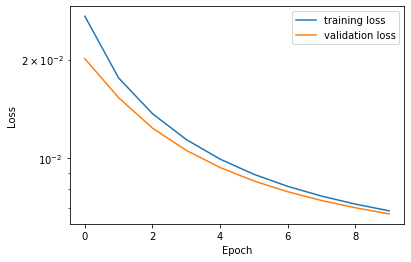

In [38]:
model = tf.keras.Sequential() #Define the model object
for i in range(3):
    model.add(tf.keras.layers.Dense(50, input_shape=(5,), activation="relu")) #Add the hidden layer

rate=0.5
#model.add(tf.keras.layers.Dropout(rate, noise_shape=None, seed=None)) #adding dropout layer

#model.add(tf.keras.layers.BatchNormalization()) #adding Batch Normalization, active for previously added layer

#Add the output layer yourself
#It should not have an activation function
#Complete me:
model.add(tf.keras.layers.Dense(1))

model.compile(tf.keras.optimizers.SGD(lr=0.001),loss=tf.keras.losses.Huber()) #SGD optimizer and Huber loss
results = model.fit(energy, target, epochs=10, batch_size=256, validation_split=0.2)

plot_learning_curve(results.history)